In [36]:
import numpy as np
import keras
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import Data_File
import cost_functions
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten,UpSampling2D
import keras.backend as K
 

In [43]:
def mean_psnr(y_true,y_pred):
    s = 0
    for i in range(len(y_true)):
        s = s + cost_functions.psnr(y_true[i]*255,y_pred[i]*255)
    return s/len(y_true)

In [44]:
train_prop = .5
test_prop = .3
v_prop = .2

Data_File.data_writer('Dataset',train_prop,test_prop,v_prop)


train_x,train_y = Data_File.Data('faces')
test_x,test_y = Data_File.Data('test')
v_x,v_y = Data_File.Data('cross_val')

In [45]:
h,w = train_y[0].shape
print (h,w)

(74, 112)


In [46]:
model = Sequential()
model.add(Conv2D(64,(3,3),padding='same',activation='relu',input_shape=(h//2,w//2,1)))
model.add(Conv2D(32,(3,3),padding='same',activation='relu'))
model.add(UpSampling2D(data_format='channels_last'))
model.add(Conv2D(16,(3,3),padding='same',activation='relu'))
model.add(Conv2D(1,(3,3),padding='same',activation='sigmoid'))

In [47]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 37, 56, 64)        640       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 37, 56, 32)        18464     
_________________________________________________________________
up_sampling2d_6 (UpSampling2 (None, 74, 112, 32)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 74, 112, 16)       4624      
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 74, 112, 1)        145       
Total params: 23,873
Trainable params: 23,873
Non-trainable params: 0
_________________________________________________________________


In [56]:
epochs = 1000
model.compile(optimizer='sgd', loss='mean_squared_error')
 
history = model.fit(train_x[:,:,:,None], train_y[:,:,:,None], epochs=epochs, verbose=1, 
                   validation_data=(v_x[:,:,:,None], v_y[:,:,:,None]))
 


Train on 84 samples, validate on 33 samples
Epoch 1/1000
84/84 [==============================] - 1s 12ms/step - loss: 0.0049 - val_loss: 0.0047
Epoch 2/1000
84/84 [==============================] - 1s 10ms/step - loss: 0.0049 - val_loss: 0.0047
Epoch 3/1000
84/84 [==============================] - 1s 8ms/step - loss: 0.0049 - val_loss: 0.0047
Epoch 4/1000
84/84 [==============================] - 1s 8ms/step - loss: 0.0049 - val_loss: 0.0047
Epoch 5/1000
84/84 [==============================] - 1s 8ms/step - loss: 0.0049 - val_loss: 0.0047
Epoch 6/1000
84/84 [==============================] - 1s 8ms/step - loss: 0.0049 - val_loss: 0.0047
Epoch 7/1000
84/84 [==============================] - 1s 8ms/step - loss: 0.0049 - val_loss: 0.0047
Epoch 8/1000
84/84 [==============================] - 1s 8ms/step - loss: 0.0049 - val_loss: 0.0047
Epoch 9/1000
84/84 [==============================] - 1s 8ms/step - loss: 0.0049 - val_loss: 0.0047
Epoch 10/1000
84/84 [==============================] -

('Average Training Loss is ', 0.00466907004066453)
('Average Training PSNR is ', 24.154429072385806)
('Average Testing Loss is ', 0.004805237142023193)
('Average Testing PSNR is ', 24.226847371791354)


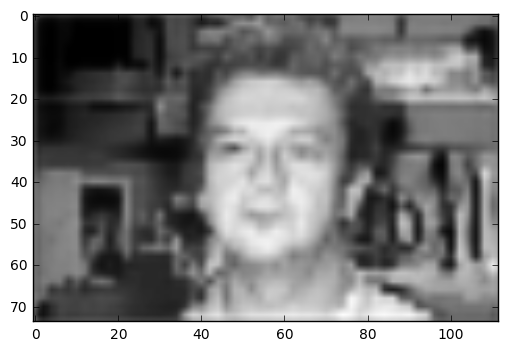

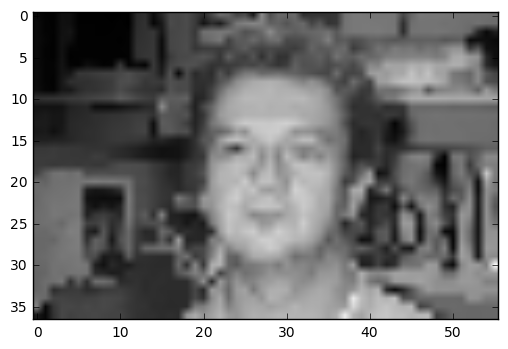

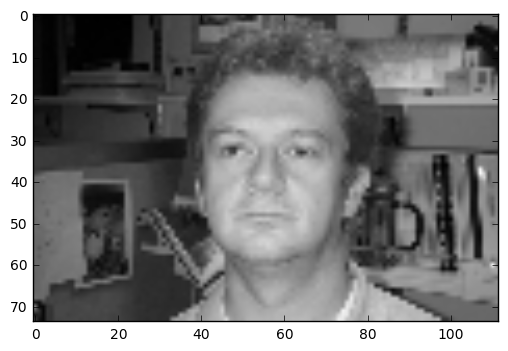

In [57]:
print ("Average Training Loss is ",cost_functions.mse_model(train_x[:,:,:,None],train_y[:,:,:,None],model))
print ("Average Training PSNR is ",cost_functions.avg_psnr(train_x[:,:,:,None],train_y[:,:,:,None],model))


print ("Average Testing Loss is ",cost_functions.mse_model(test_x[:,:,:,None],test_y[:,:,:,None],model))
print ("Average Testing PSNR is ",cost_functions.avg_psnr(test_x[:,:,:,None],test_y[:,:,:,None],model))




gen_imgs = model.predict(train_x[:,:,:,None])
plt.imshow(gen_imgs[0].reshape((h,w)),cmap='gray')
fig = plt.figure()
plt.imshow(train_x[0],cmap='gray')
fig = plt.figure()
plt.imshow(train_y[0],cmap='gray')





plt.show()
